<a href="https://colab.research.google.com/github/anusree-k-r/Anusree-K-R-works/blob/main/Anusree_K_R_preprocessing_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
data = pd.read_csv('titanic_dataset.csv')

In [90]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [76]:
### Making ‘PassengerId’ as the index column

In [91]:
data.set_index('PassengerId', drop=True, append=False, inplace= False, verify_integrity=False)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [77]:
### Checking the basic details of the dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.shape

(891, 12)

In [7]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
freqgraph1 = data.select_dtypes(include=['float'])

In [10]:
freqgraph2 = data.select_dtypes(include=['int'])

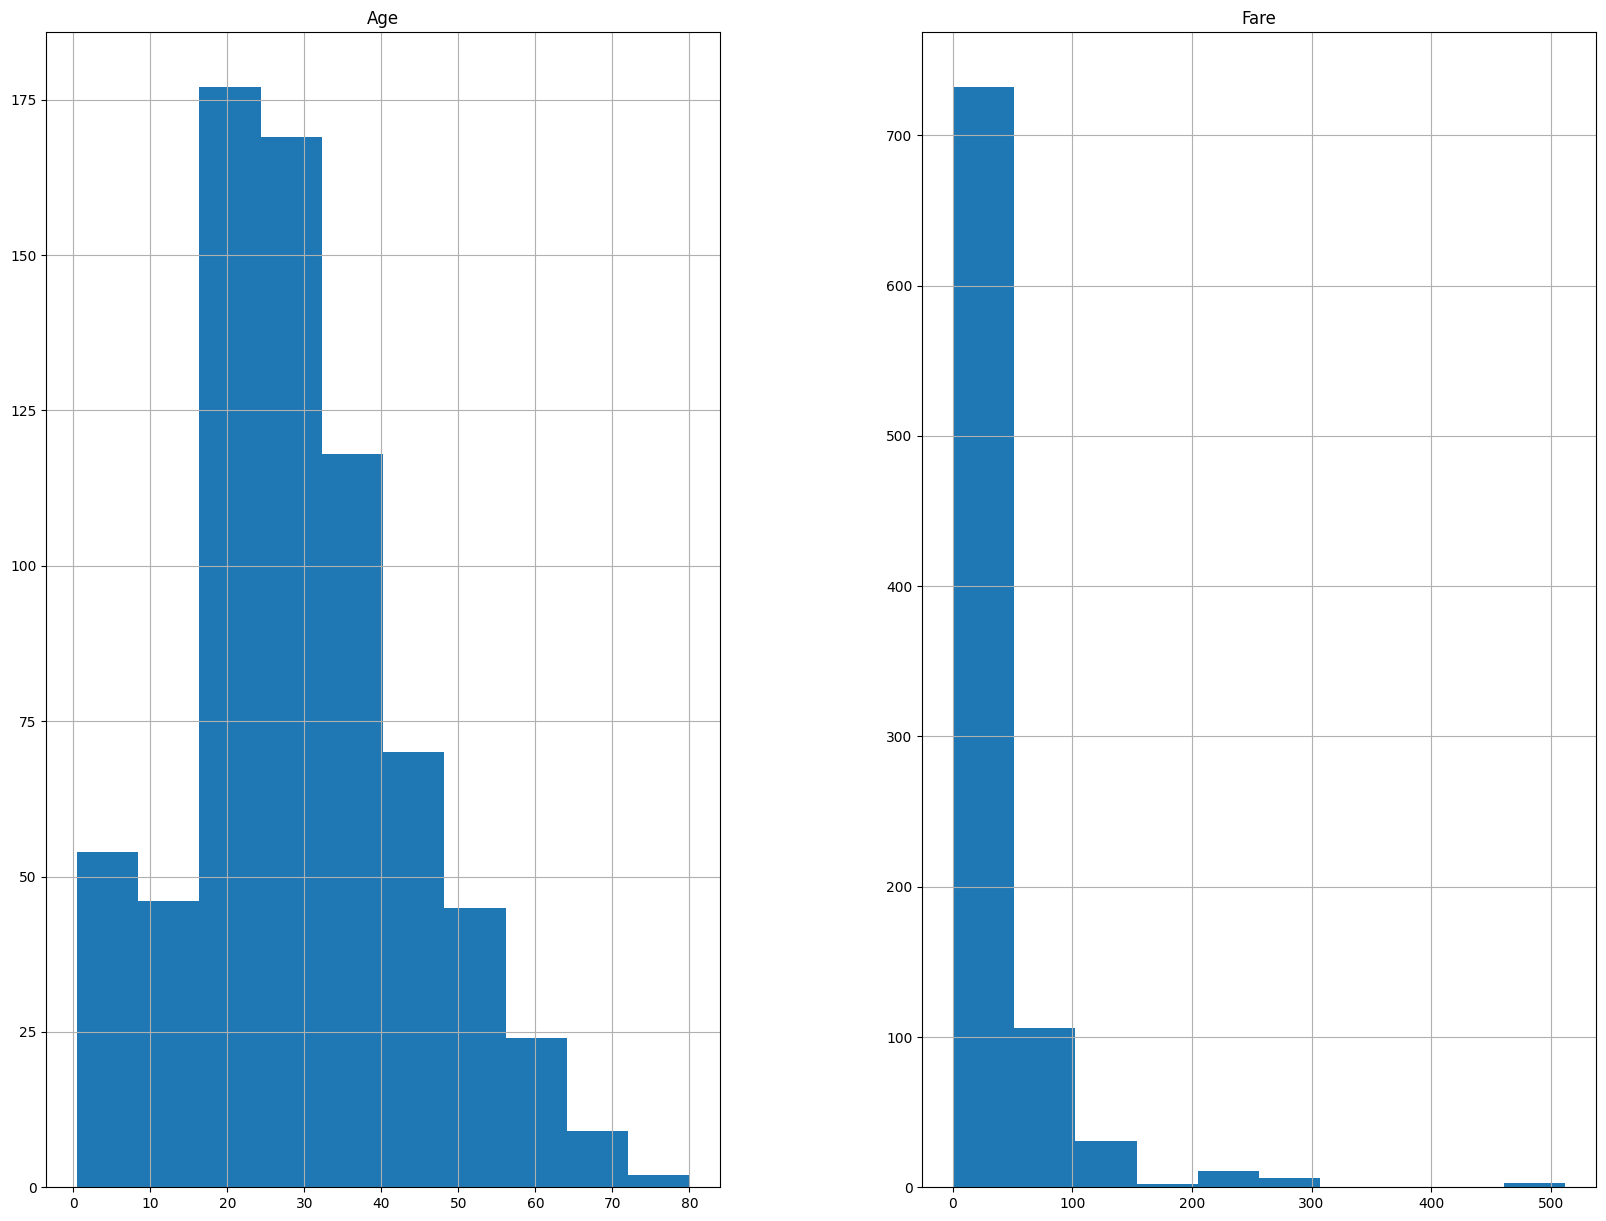

In [92]:
freqgraph1.hist(figsize=(20,15))
plt.show()

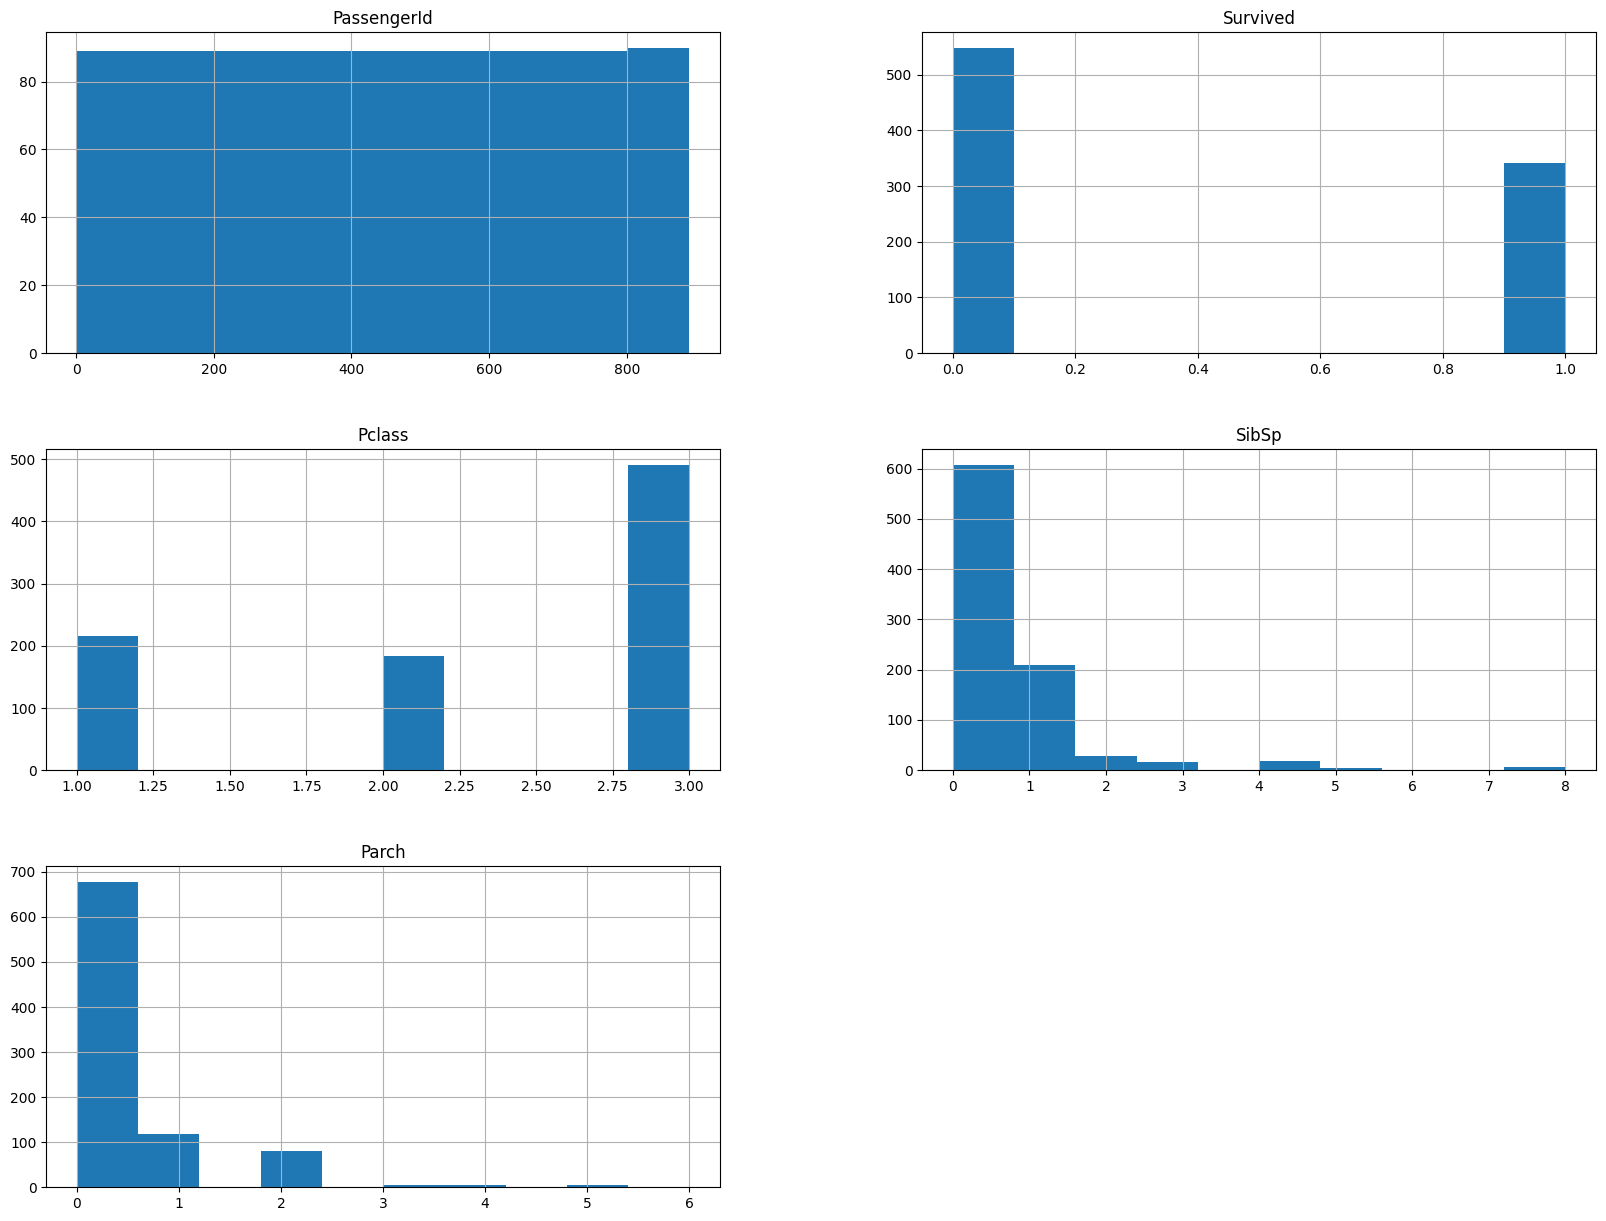

In [93]:
freqgraph2.hist(figsize=(20,15))
plt.show()

In [78]:
### Filling in all the missing values present in all the columns in the dataset

SyntaxError: ignored

In [13]:
data['Age'] = data['Age'].fillna(data['Age']).median()

In [14]:
data['Cabin'] = data['Cabin'].fillna("unknown")

In [15]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [16]:
data['Embarked'] = data['Embarked'].fillna("S")

In [17]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [79]:
### Handling outliers

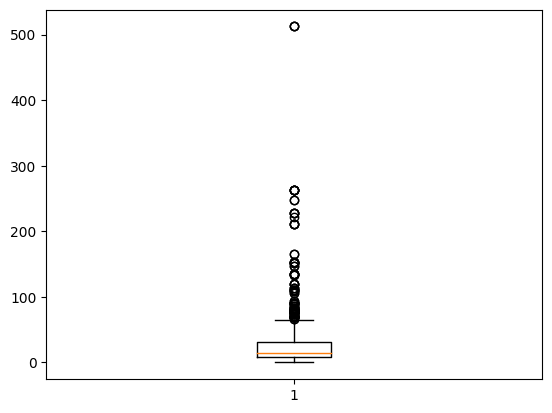

In [94]:
plt.boxplot(data['Fare'])
plt.show()

In [19]:
Q1 = np.percentile(data['Fare'],25, interpolation='midpoint')
Q2 = np.percentile(data['Fare'],50, interpolation='midpoint')
Q3 = np.percentile(data['Fare'],75, interpolation='midpoint')

<ipython-input-19-af8eb83a922e>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['Fare'],25, interpolation='midpoint')
<ipython-input-19-af8eb83a922e>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2 = np.percentile(data['Fare'],50, interpolation='midpoint')
<ipython-input-19-af8eb83a922e>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile

In [20]:
print(Q1)
print(Q2)
print(Q3)

7.9104
14.4542
31.0


In [21]:
IQR = Q3-Q1

In [22]:
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR

In [23]:
print(low_lim)
print(up_lim)

-26.724
65.6344


In [24]:
outlier = []
for x in data ['Fare']:
    if (x<low_lim) or (x>up_lim):
        outlier.append(x)

In [25]:
outlier

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 80.0,
 83.1583,
 6

In [41]:
ind2 = data['Fare']>up_lim

In [42]:
data.loc[ind2].index

Int64Index([  1,  27,  31,  34,  52,  61,  62,  72,  88, 102,
            ...
            792, 802, 820, 829, 835, 846, 849, 856, 863, 879],
           dtype='int64', length=116)

In [63]:
data2 = data.drop([1, 27, 31, 34, 52, 61, 62, 72, 88, 102, 118, 120, 124, 139, 151, 159, 180, 195, 201, 215, 218, 224, 230, 245, 256, 257, 258, 262, 268, 269, 275, 290, 291, 297, 299, 305, 306, 307, 310, 311, 318, 319, 324, 325, 332, 334, 336, 337, 341, 366, 369, 373, 375, 377, 380, 385, 390, 393, 412, 435, 438, 445, 453, 484, 486, 496, 498, 504, 505, 520, 527, 537, 540, 544, 550, 557, 558, 581, 585, 587, 591, 609, 627, 641, 645, 655, 659, 660, 665, 679, 681, 689, 698, 700, 708, 716, 730, 737, 741, 742, 745, 759, 763, 765, 779, 789, 792, 802, 820, 829, 835, 846, 849, 856, 863, 879], inplace= True)

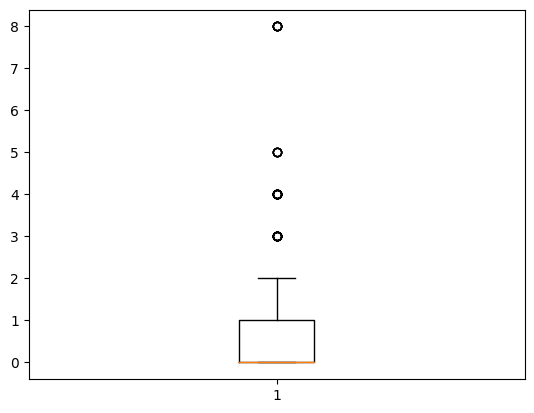

In [95]:
plt.boxplot(data['SibSp'])
plt.show()

In [48]:
Q1 = np.percentile(data['SibSp'],25, interpolation='midpoint')
Q2 = np.percentile(data['SibSp'],50, interpolation='midpoint')
Q3 = np.percentile(data['SibSp'],75, interpolation='midpoint')

<ipython-input-48-9f879651fdcd>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['SibSp'],25, interpolation='midpoint')
<ipython-input-48-9f879651fdcd>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2 = np.percentile(data['SibSp'],50, interpolation='midpoint')
<ipython-input-48-9f879651fdcd>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percenti

In [ ]:
print(Q1)
print(Q2)
print(Q3)

In [49]:
IQR = Q3-Q1

In [50]:
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR

In [51]:
print(low_lim)
print(up_lim)

-1.5
2.5


In [53]:
outlier2 = []
for x in data ['SibSp']:
     if (x<low_lim) or (x>up_lim):
          outlier2.append(x)

In [54]:
outlier2

[3,
 4,
 3,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 3,
 4,
 8,
 4,
 4,
 3,
 8,
 4,
 8,
 3,
 4,
 4,
 4,
 4,
 8,
 3,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 3,
 4,
 8,
 4,
 3,
 4,
 8,
 4,
 8]

In [55]:
ind3 = data['SibSp']>up_lim

In [56]:
data.loc[ind3].index

Int64Index([  7,  16,  24,  27,  50,  59,  63,  68,  71,  85,  88, 119, 159,
            164, 171, 176, 180, 182, 201, 229, 233, 261, 266, 278, 324, 341,
            374, 386, 409, 480, 485, 541, 542, 634, 642, 683, 686, 726, 787,
            792, 813, 819, 824, 846, 850, 863],
           dtype='int64')

In [60]:
data3 = data.drop([7,  16,  24,  27,  50,  59,  63,  68,  71,  85,  88, 119, 159,164, 171, 176, 180, 182, 201, 229, 233, 261, 266, 278, 324, 341,374, 386, 409, 480, 485, 541, 542, 634, 642, 683, 686, 726, 787,792, 813, 819, 824, 846, 850, 863])

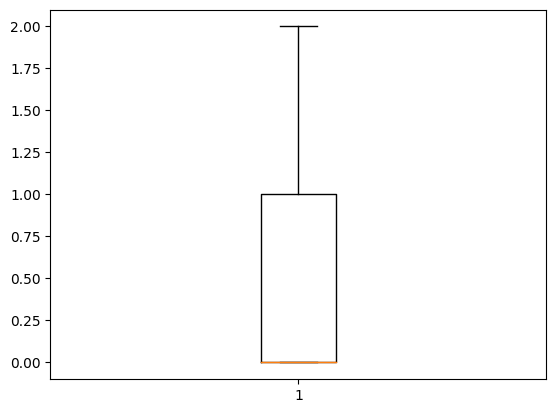

In [96]:
plt.boxplot(data3['SibSp'])
plt.show()

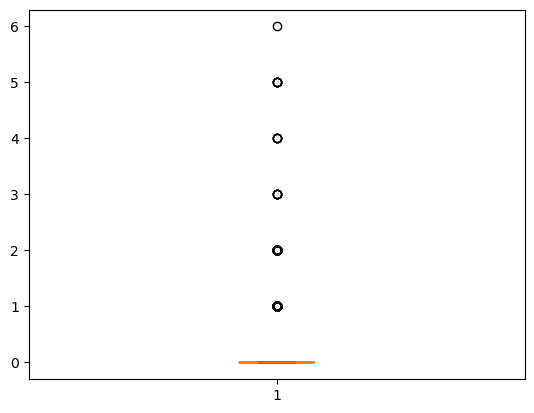

In [97]:
plt.boxplot(data['Parch'])
plt.show()

In [66]:
Q1 = np.percentile(data['Parch'],25, interpolation='lower')
Q2 = np.percentile(data['Parch'],50, interpolation='lower')
Q3 = np.percentile(data['Parch'],75, interpolation='lower')

<ipython-input-66-42dcae241dfa>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['Parch'],25, interpolation='lower')
<ipython-input-66-42dcae241dfa>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2 = np.percentile(data['Parch'],50, interpolation='lower')
<ipython-input-66-42dcae241dfa>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(dat

In [67]:
print(Q1)
print(Q2)
print(Q3)

0
0
0


In [68]:
### Since Q1 = Q2 = Q3 = 0 we can't remove the outlier using usual technique.

In [74]:
###Do min max scaling on the feature set (Take ‘Survived’ as target)

In [69]:
from sklearn.preprocessing import MinMaxScaler

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(data, data, test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((542, 12), (233, 12))

In [72]:
X_train = X_train.drop(['Name','Sex','Ticket','Cabin','Embarked'] , axis=1)

In [73]:
mms = MinMaxScaler().fit(X_train[['Survived']])
X_train_copy = X_train.copy(deep=True)
X_train_copy['Survived_minmax'] = mms.transform(X_train_copy[['Survived']])
print(X_train_copy.head(10))

     PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  \
654          655         0       3  18.0      0      0   6.7500   
38            39         0       3  18.0      2      0  18.0000   
646          647         0       3  19.0      0      0   7.8958   
727          728         1       3   NaN      0      0   7.7375   
887          888         1       1  19.0      0      0  30.0000   
426          427         1       2  28.0      1      0  26.0000   
554          555         1       3  22.0      0      0   7.7750   
743          744         0       3  24.0      1      0  16.1000   
171          172         0       3   4.0      4      1  29.1250   
327          328         1       2  36.0      0      0  13.0000   

     Survived_minmax  
654              0.0  
38               0.0  
646              0.0  
727              1.0  
887              1.0  
426              1.0  
554              1.0  
743              0.0  
171              0.0  
327              1.0  
